# Sentiment Analysis on Movie Reviews

## About Data
data from https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
* train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.

* test.tsv contains just phrases. You must assign a sentiment label to each phrase.

The sentiment labels are:

0 - negative

1 - somewhat negative

2 - neutral

3 - somewhat positive

4 - positive

## 定義問題
* 這個問題是如何產生的？這個問題的預期產出是什麼？預測電影評論屬於哪一個sentiment labels
* 它提供了哪些資訊、資料與變數？phrase / sentiment

## 選擇什麼方法？
* 是監督還是非監督學習？監督式學習
* 是分類還是回歸？分類問題

In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp --upgrade

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_core as keras
import keras_nlp
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend


In [3]:
train= pd.read_csv("train.tsv", sep="\t")
test = pd.read_csv("test.tsv", sep="\t")
print(train.shape, test.shape)

(156060, 4) (66292, 3)


In [4]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [6]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [7]:
train['Phrase'] = train['Phrase'].str.lower()
test['Phrase'] = test['Phrase'].str.lower()

In [8]:
train["length"] = train["Phrase"].apply(lambda x : len(x))
test["length"] = test["Phrase"].apply(lambda x : len(x))

print("Train Length Stat")
print(train["length"].describe())
print("-----------------")
print("Test Length Stat")
print(test["length"].describe())

Train Length Stat
count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: length, dtype: float64
-----------------
Test Length Stat
count    66292.000000
mean        37.266699
std         36.555142
min          1.000000
25%         12.000000
50%         23.000000
75%         49.000000
max        256.000000
Name: length, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split

X = train["Phrase"]
y = train["Sentiment"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test["Phrase"]

In [10]:
# Use a shorter sequence length.
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_small_en_uncased",
    sequence_length=300
)

# Pretrained classifier.
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_small_en_uncased",
    preprocessor = preprocessor,
    num_classes=5
)

classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras_nlp/src/models/backbone.py:37: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_nlp/src/models/backbone.py:37: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


Preprocessor: "bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ segment_ids (InputLayer)                      │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ bert_backbone (BertBackbone)                  │ {sequence_output: (None, None, 512),   │      28,763,648 │
│                                               │ pooled_output: (None, 512)}            │                 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ dropout (Dropout)                             │ (None, 512)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 5)                              │           2,565 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 28,766,213 (109.73 MB)

 Trainable params: 28,766,213 (109.73 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate = 1e-5)
# Compile
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    metrics=["accuracy"]
)


# Fit
history = classifier.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_val, y_val)
)

Epoch 1/5
3902/3902 [==============================] - 1610s 406ms/step - loss: 0.9244 - accuracy: 0.6213 - val_loss: 0.8192 - val_accuracy: 0.6585
Epoch 2/5
3902/3902 [==============================] - 1631s 418ms/step - loss: 0.7997 - accuracy: 0.6694 - val_loss: 0.7797 - val_accuracy: 0.6761
Epoch 3/5
3902/3902 [==============================] - 1581s 405ms/step - loss: 0.7409 - accuracy: 0.6937 - val_loss: 0.7600 - val_accuracy: 0.6844
Epoch 4/5
3902/3902 [==============================] - 1644s 421ms/step - loss: 0.7021 - accuracy: 0.7108 - val_loss: 0.7532 - val_accuracy: 0.6890
Epoch 5/5
3902/3902 [==============================] - 1641s 421ms/step - loss: 0.6672 - accuracy: 0.7243 - val_loss: 0.7597 - val_accuracy: 0.6874


In [15]:
y_pred_val = classifier.predict(X_val)

976/976 [==============================] - 148s 151ms/step


In [21]:
y_pred_val

array([[ 0.0190572 ,  2.5587184 ,  2.0596795 , -1.2628757 , -4.4003153 ],
       [-4.2300425 , -1.8963598 ,  0.73921305,  2.9102821 ,  1.5979278 ],
       [-4.039154  , -1.5336456 ,  4.400162  ,  1.3277155 , -2.8768842 ],
       ...,
       [-2.4892395 ,  0.49876508,  3.2650404 ,  0.3605115 , -2.9682148 ],
       [-3.8495612 , -0.19575977,  4.006655  ,  1.1719284 , -3.5467343 ],
       [-3.1105492 ,  1.0864546 ,  3.7894056 ,  0.2726319 , -4.182517  ]],
      dtype=float32)

In [22]:
y_val

95722     2
147312    4
36991     2
150211    2
140655    1
         ..
115807    3
103403    2
78143     2
55596     2
118795    1
Name: Sentiment, Length: 31212, dtype: int64

In [23]:
from sklearn.metrics import classification_report
# 將模型輸出的預測分數轉換為類別標籤
y_pred_val_labels = np.argmax(y_pred_val, axis=1)

# 生成分類
report = classification_report(y_val, y_pred_val_labels)

print(report)

              precision    recall  f1-score   support

           0       0.52      0.49      0.50      1416
           1       0.58      0.58      0.58      5527
           2       0.78      0.80      0.79     15639
           3       0.63      0.58      0.60      6707
           4       0.54      0.60      0.57      1923

    accuracy                           0.69     31212
   macro avg       0.61      0.61      0.61     31212
weighted avg       0.69      0.69      0.69     31212



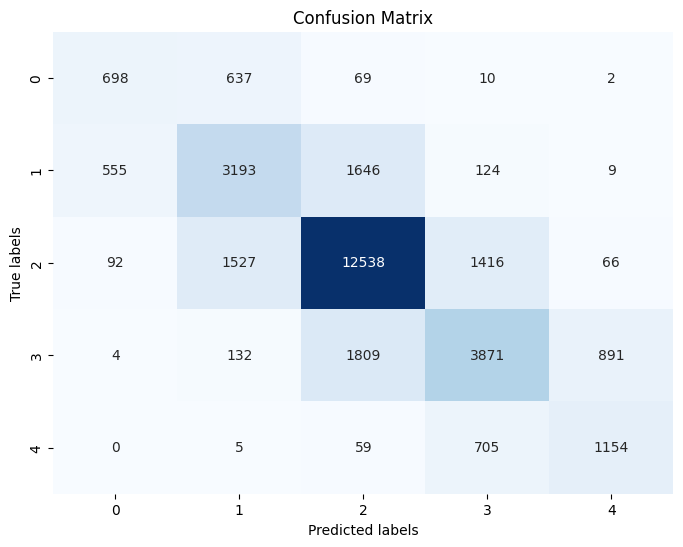

In [25]:
# 混淆矩陣
conf_matrix = confusion_matrix(y_val, y_pred_val_labels)

# 畫圖
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
sample_submission = pd.read_csv("sampleSubmission.csv")
sample_submission.head()
sample_submission["Sentiment"] = np.argmax(classifier.predict(X_test), axis=1)
sample_submission.describe()
sample_submission.to_csv("submission.csv", index=False)

2072/2072 [==============================] - 319s 154ms/step


# 結論
### 2類別預測最準，0 / 4預測最不準，這裡的問題是類別data數量不平衡導致模型的性能評估出現偏差
下列三種方法都可以處理類別不平衡問題 : 
* 過採樣（Oversampling）
* 欠採樣（Undersampling）
* 生成對抗網絡（Generative Adversarial Networks，GANs）

### model選擇4-layer BERT是因為比較小運行時間比較短，如果不考慮設備以及訓練時間長短，可以使用12-layer BERT或是GPT-2